In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
HR_Data_Frame = pd.read_csv("C:/Users/Tom Lowe/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")
HR_Data_Frame

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
HR_Data_Frame.shape

(1470, 35)

In [4]:
# check if every employee appears only once - what is the % of multiple observations per employee
1- (HR_Data_Frame.nunique()['EmployeeNumber'])/(HR_Data_Frame.shape[0])


0.0

In [5]:
# Check for missing Values in Data set
HR_Data_Frame.isna().values.any()

False

In [6]:
# What types our collumns are?
HR_Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Check for missing information
if HR_Data_Frame.isnull().values.any()==0 and HR_Data_Frame.isna().values.any()==0:
    print("No information is missing")
else:
    print("There are missing information")

No information is missing


In [8]:
# Add column Feature engeneering
HR_Data_Frame['perc_of_career_in_company'] = HR_Data_Frame['YearsAtCompany']/HR_Data_Frame['TotalWorkingYears']
for row in HR_Data_Frame.index:
    if HR_Data_Frame.loc[row, 'TotalWorkingYears'] == 0 and HR_Data_Frame.loc[row, 'YearsAtCompany'] == 0:
        HR_Data_Frame.loc[row, 'perc_of_career_in_company'] = 1.

In [9]:
# Check for missing information
if HR_Data_Frame.isnull().values.any()==0 and HR_Data_Frame.isna().values.any()==0:
    print("No information is missing")
else:
    print("There are missing information")

No information is missing


In [10]:
# What unuiq values does BusinessTravel att have?
HR_Data_Frame.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [11]:
# Delete Irrelevant collumns.
HR_Data_Frame.drop(columns=['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'], inplace=True)
# Change a-numeric types to numeric.
HR_Data_Frame.Attrition.replace(["Yes", "No"], ["1", "0"], inplace=True)
HR_Data_Frame.Attrition = HR_Data_Frame.Attrition.astype('int64')
HR_Data_Frame.OverTime.replace(["Yes", "No"], ["1", "0"], inplace=True)
HR_Data_Frame.OverTime = HR_Data_Frame.OverTime.astype('int64')
HR_Data_Frame.BusinessTravel.replace(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], ['1', '2', '0'], inplace=True)
HR_Data_Frame.BusinessTravel = HR_Data_Frame.BusinessTravel.astype('int64')

In [12]:
obj_to_cat = []
for column in HR_Data_Frame.columns:
    if HR_Data_Frame[column].dtypes == 'object':
        obj_to_cat.append(column)
for column in obj_to_cat: 
    HR_Data_Frame[column] = HR_Data_Frame[column].astype('category')


In [13]:
# Look at what unique values we have in each collumn in data frame.
for column in HR_Data_Frame.columns:
    print(column, ":", HR_Data_Frame[column].unique())

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [1 0]
BusinessTravel : [1 2 0]
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452 

The data in the csv file deals with the erosion status of
The employees at IBM. A total of 1470 observations were collected
which include attrition data, and characteristics of income, seniority,
and other demographic data.
The raw data as received included 35 variables:
26 variables of type Integer
6 String variables
3 Boolean variables

##  EDA on Data Frame + some feature eng.


In [14]:
#sns.set(font_scale=1.3)


First, a check was made on the raw data that each employee exists once and there is no missing information.
After that, we will check if there are any data that are not relevant to the model, such as employee number and category that has an answer
uniform (for example - "over 18 years old" all employees are over 18 years old, therefore the column can be taken down).
Next, we were asked whether the model could be improved, and as a result, the column was added - the percentage of the employee's career
in the company. In order to fit and perform models on the data frame, the data columns were divided
into three groups:
1
. Numeric columns.
2
. Categorical columns with two answers, and coding them to 0,1.
3
. Categorical columns that have more than two possible answers are checked for ordinal:
3.1
. If ordinal: maps the answers to groups and coding according to the meaning of the category.
3.2. If not ordinal: the function get_dummie is used

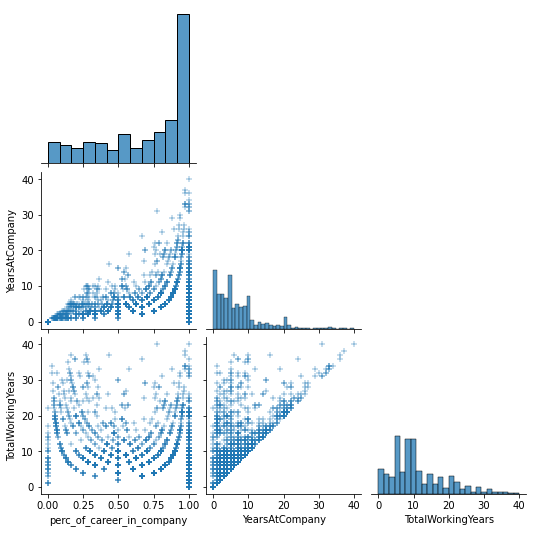

In [15]:
working = HR_Data_Frame[['perc_of_career_in_company', 'YearsAtCompany', 'TotalWorkingYears']]
sns.pairplot(working.iloc[:,:], markers='+', corner=True)


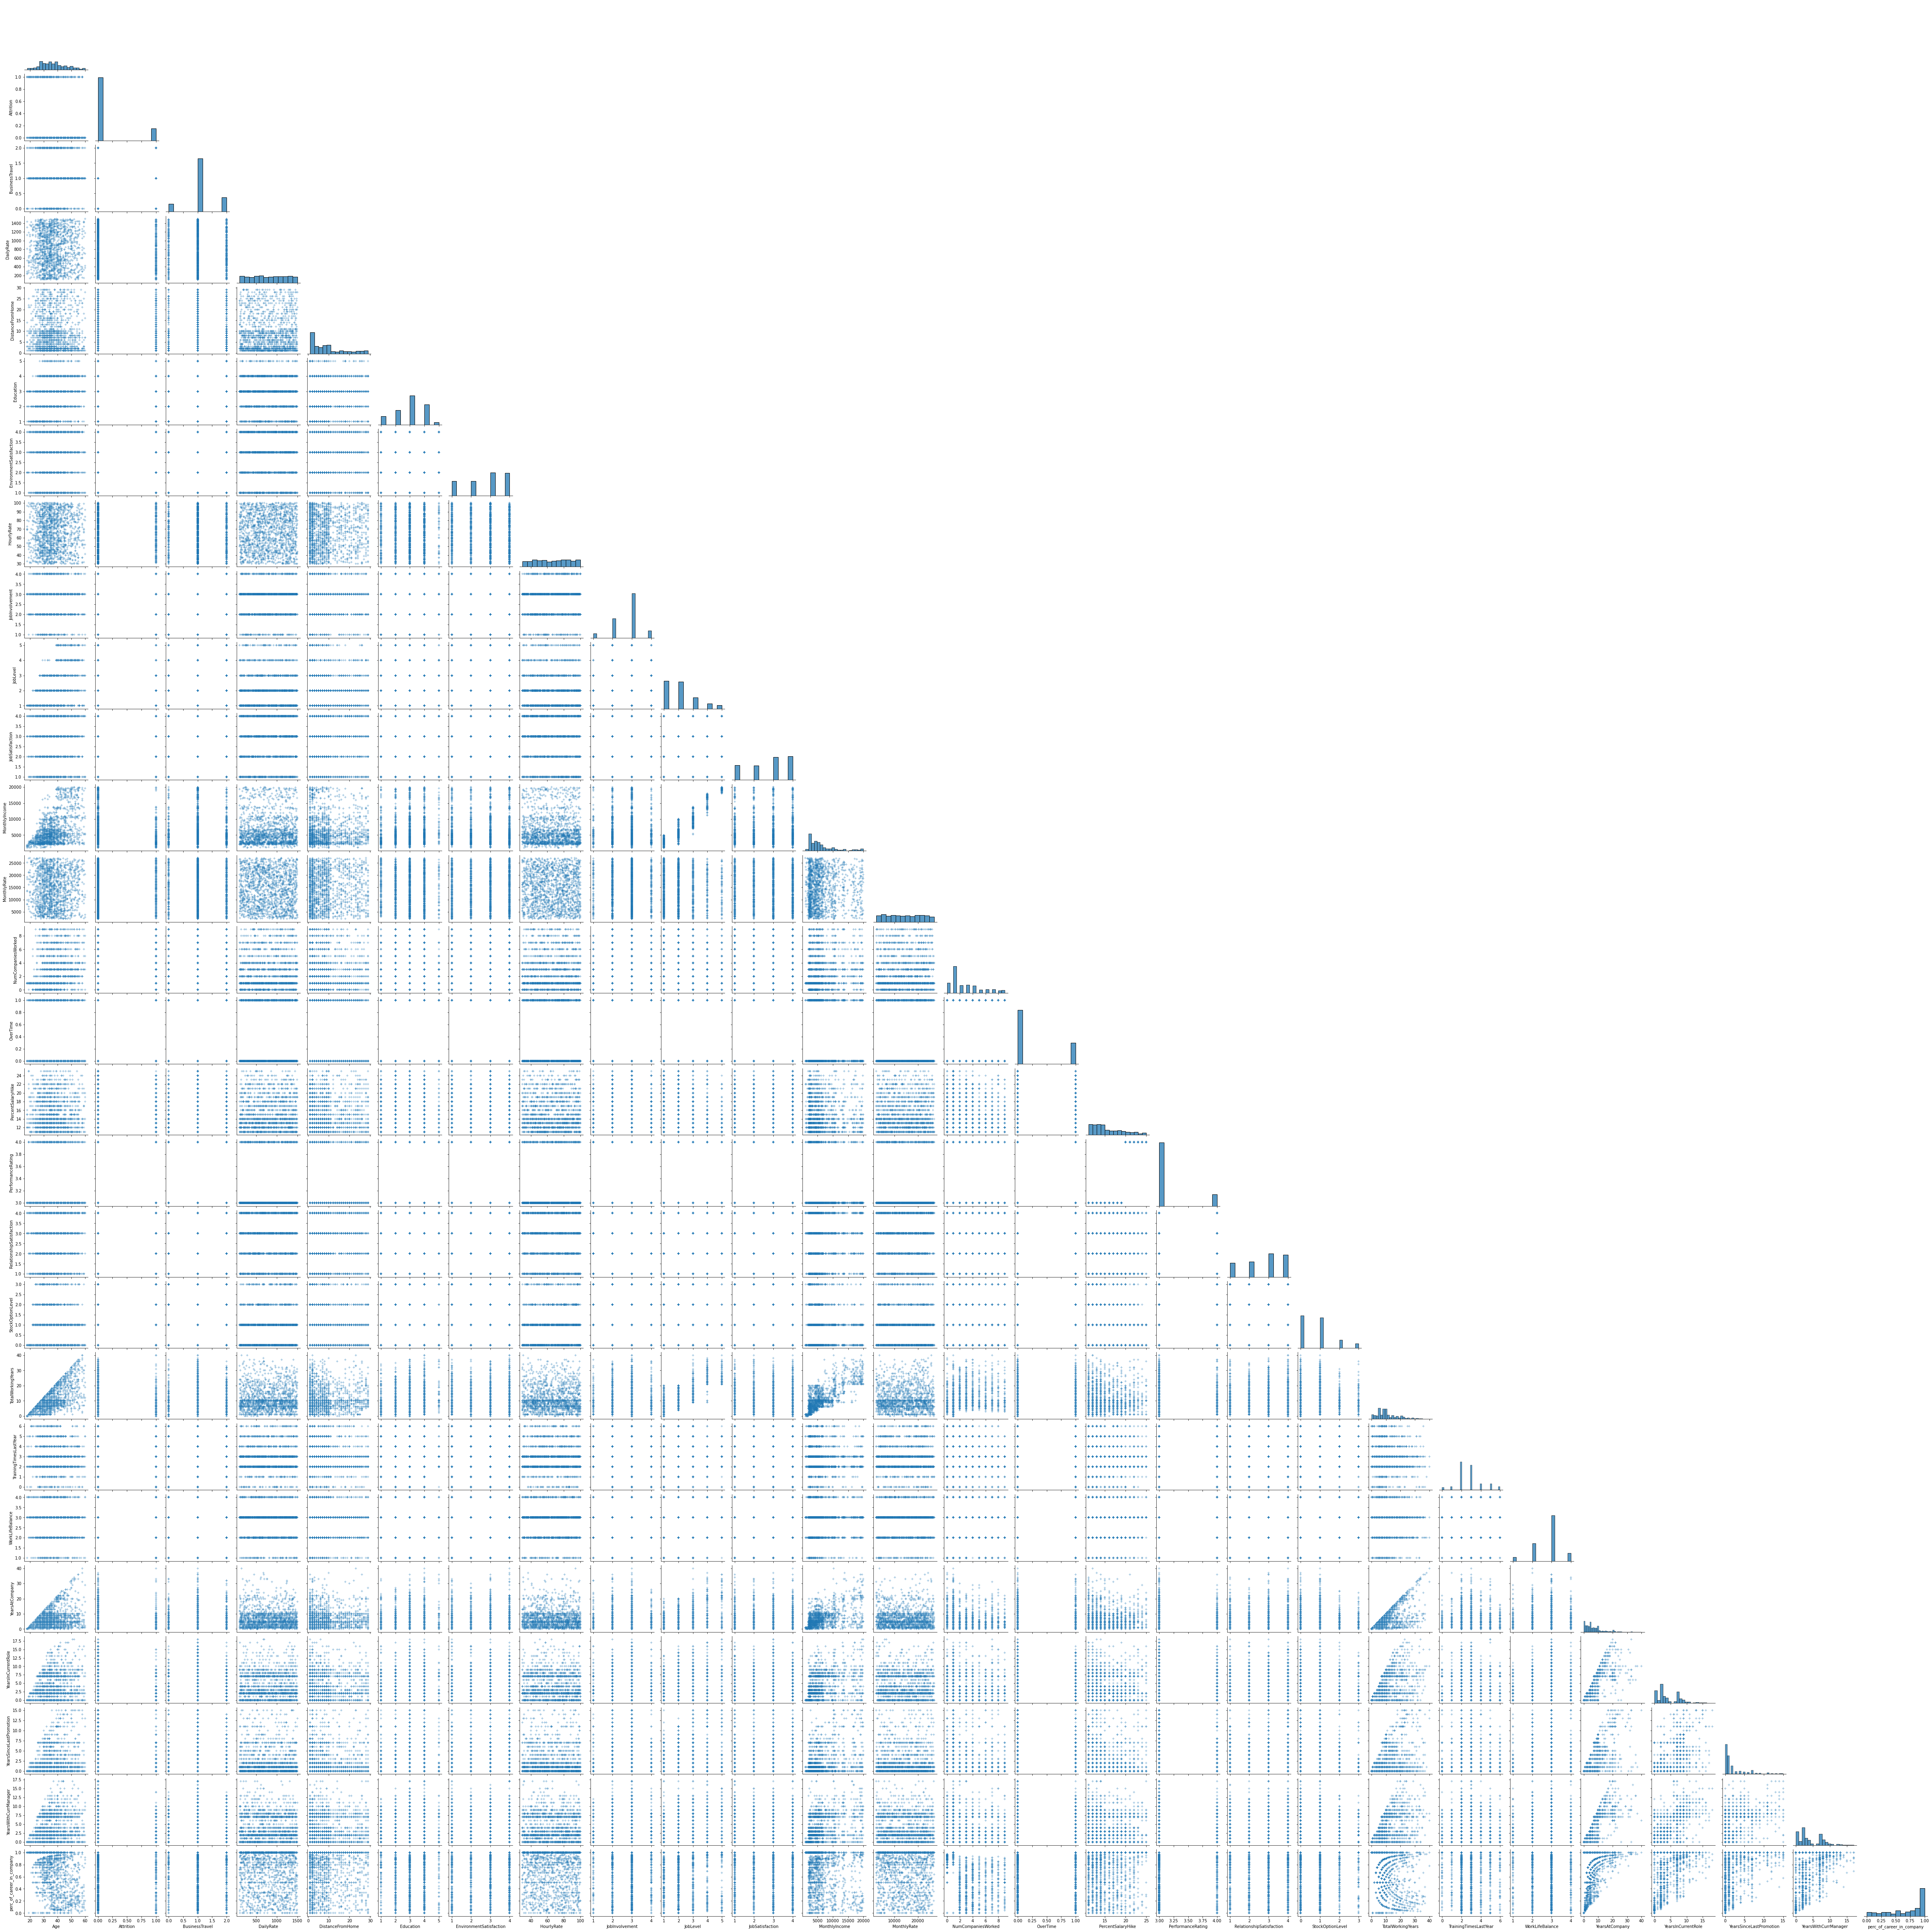

In [16]:
sns.pairplot(HR_Data_Frame.iloc[:,:], markers='+', corner=True)


<ipython-input-17-f00efcaab640>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12, 6))


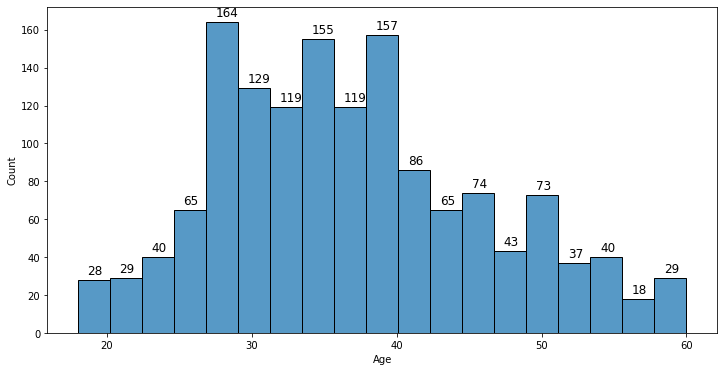

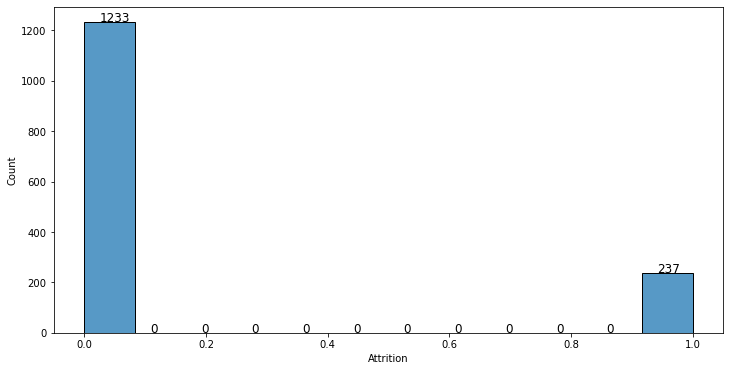

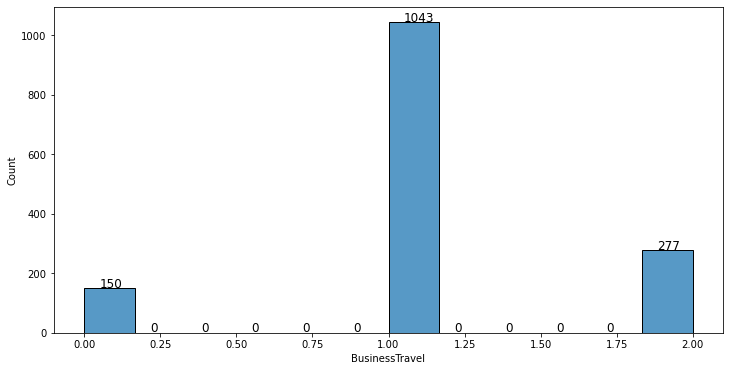

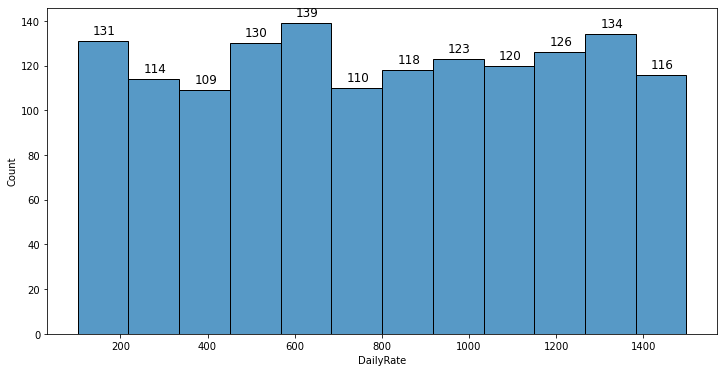

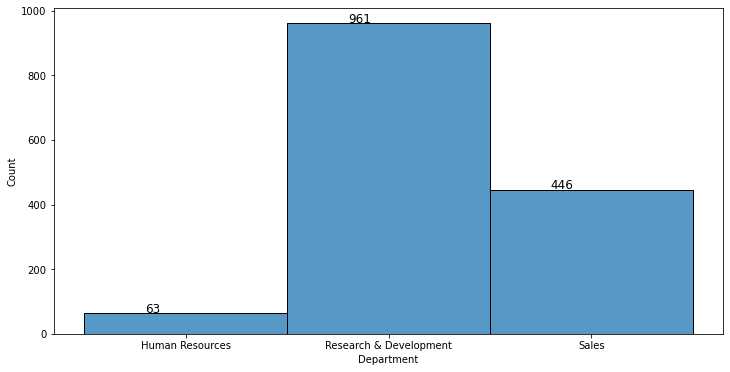

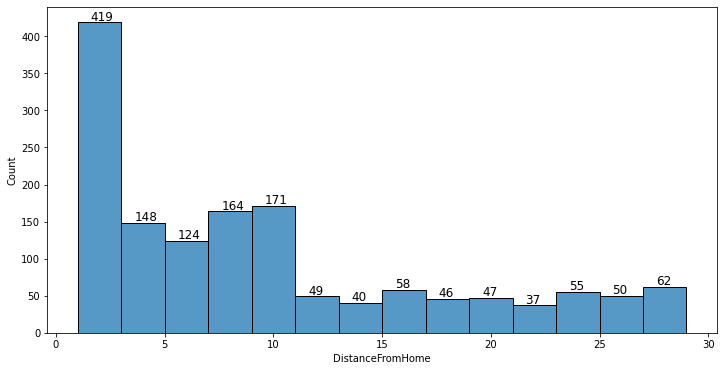

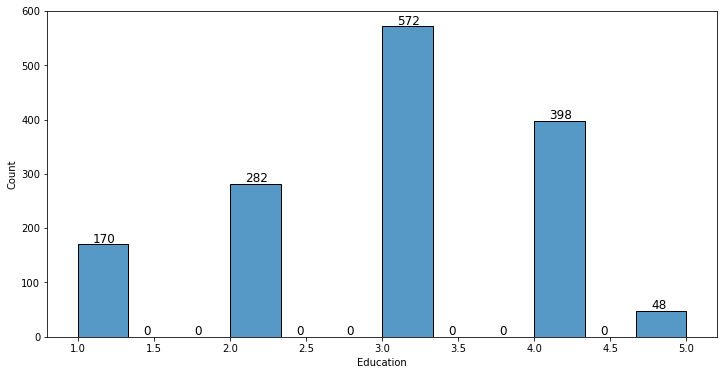

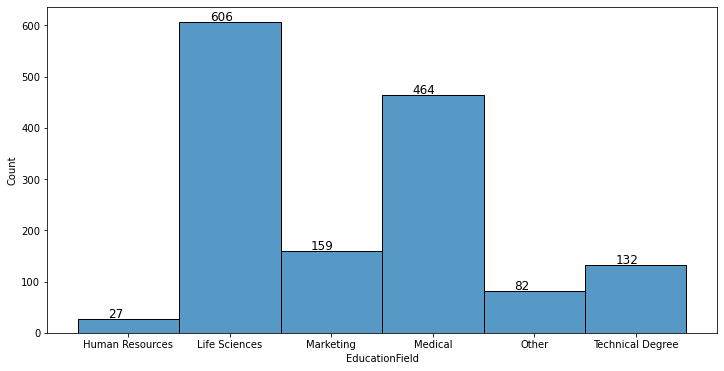

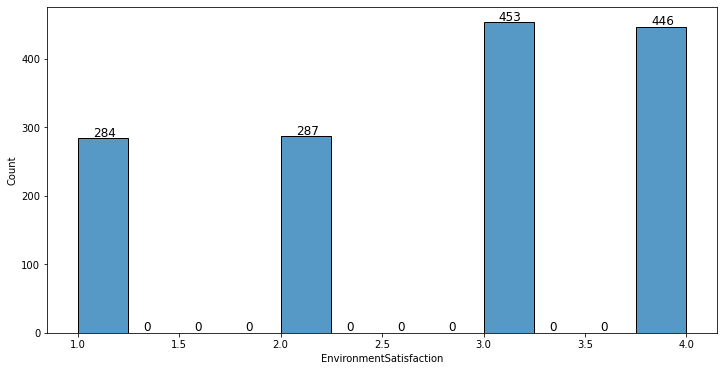

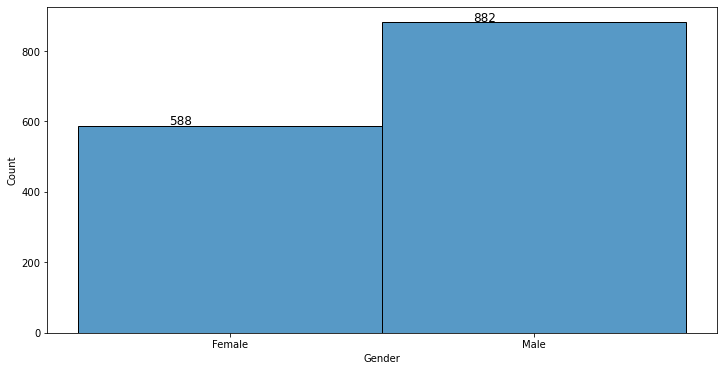

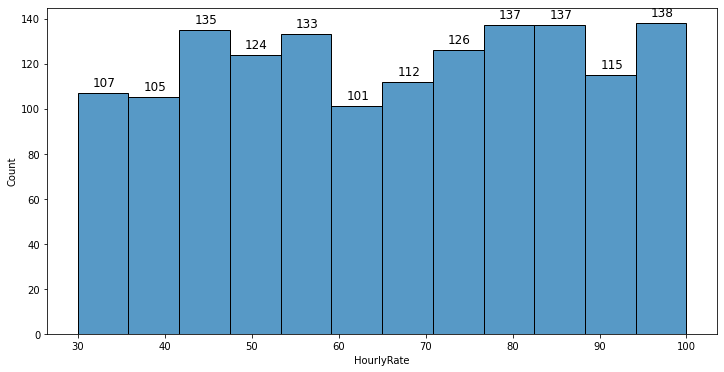

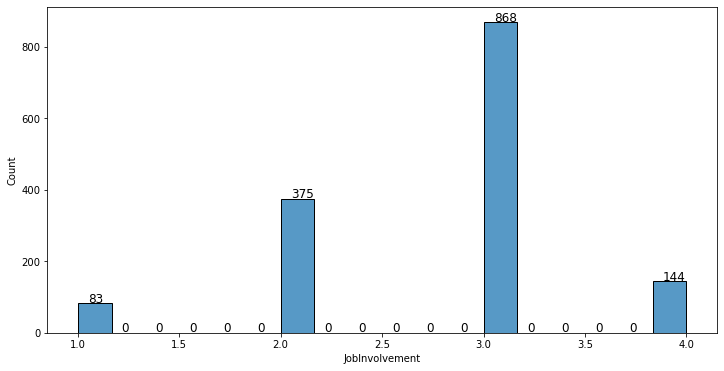

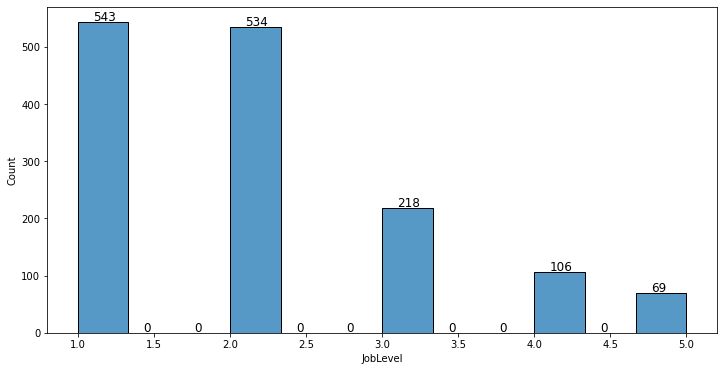

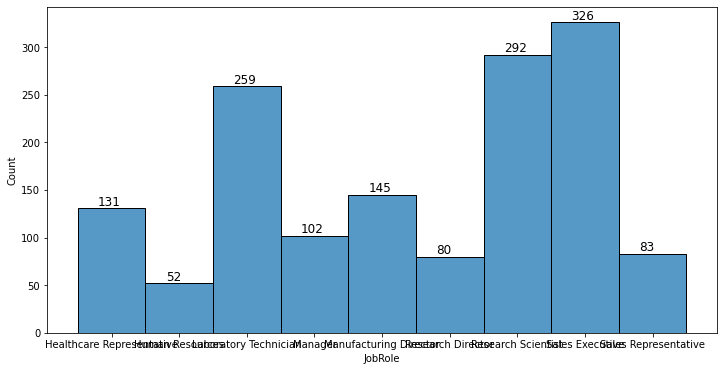

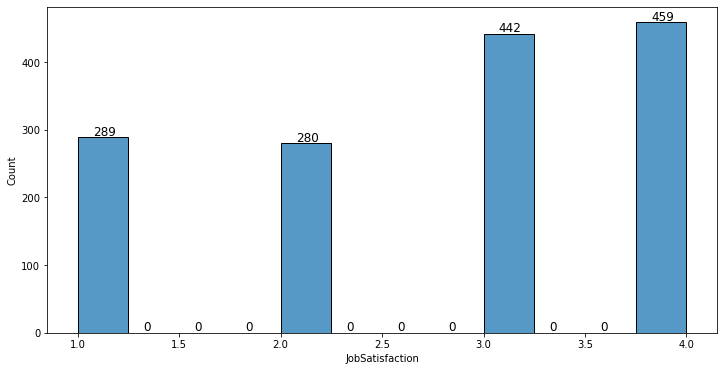

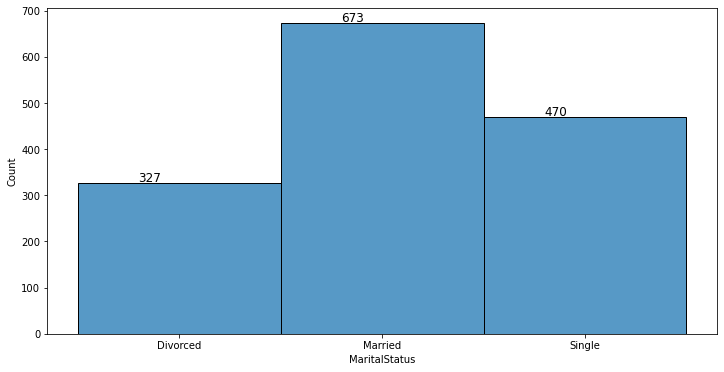

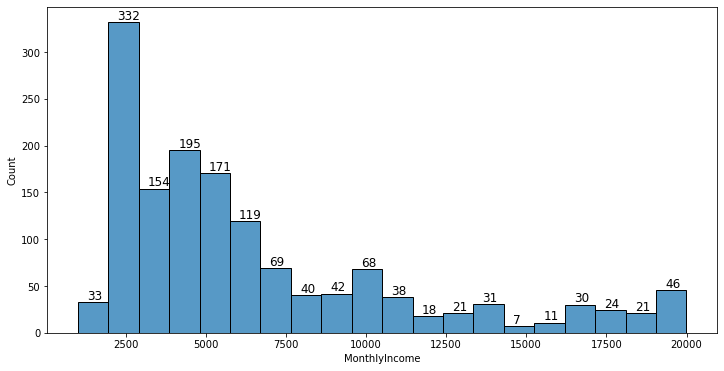

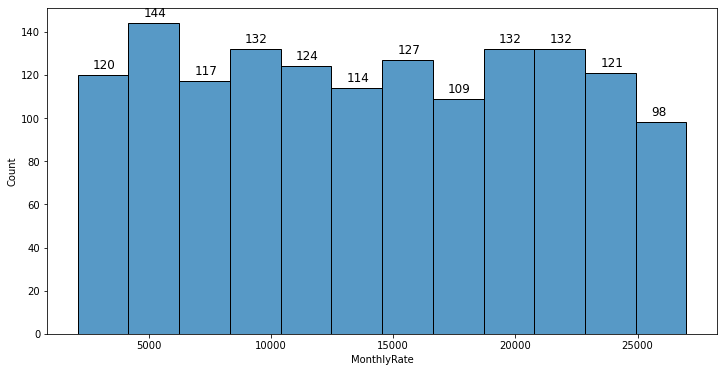

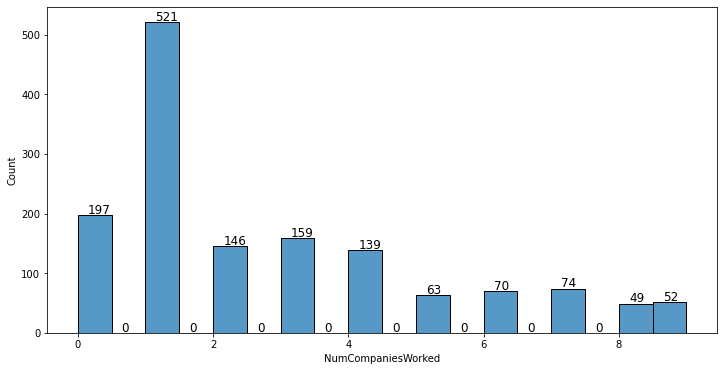

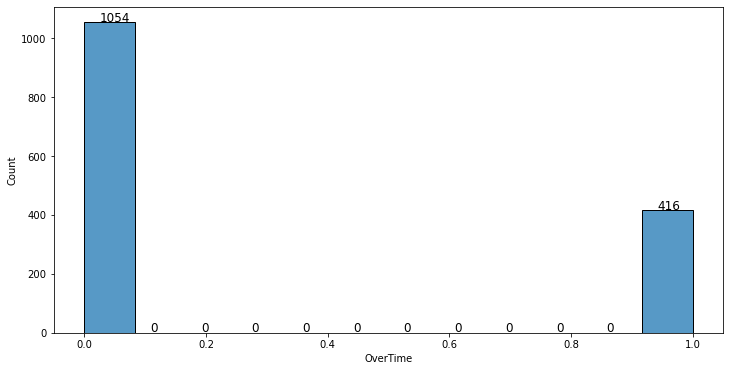

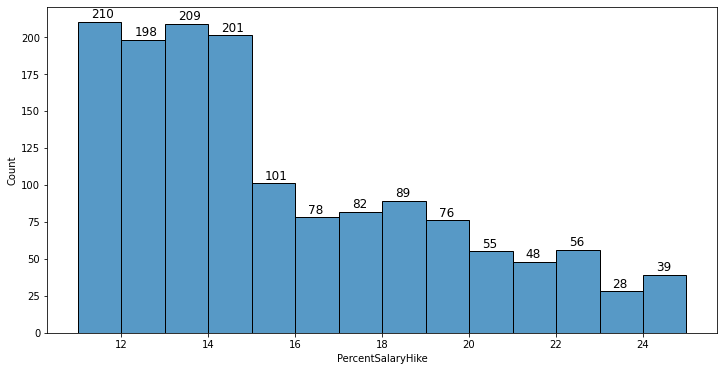

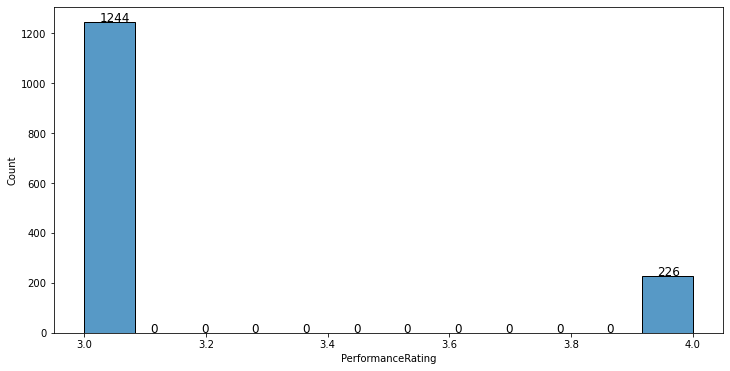

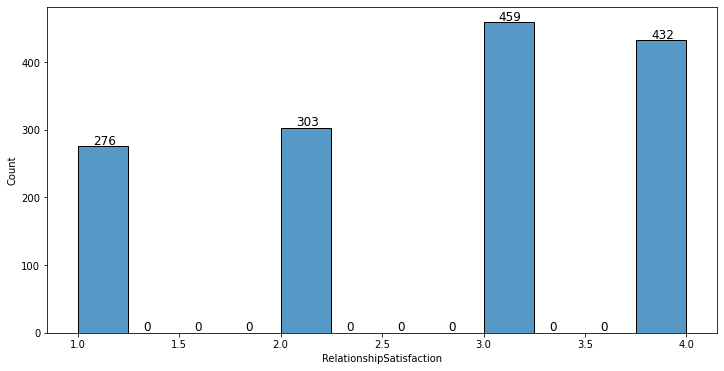

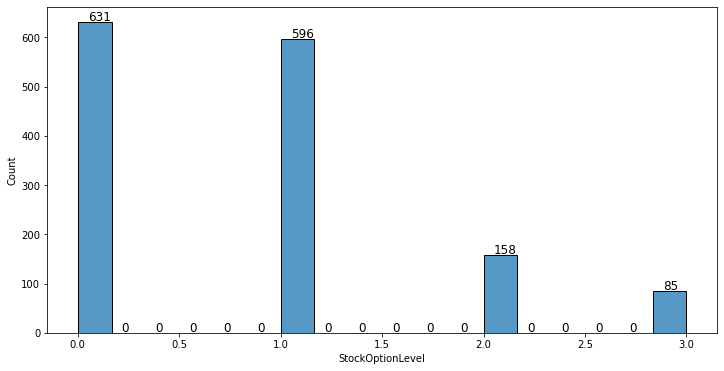

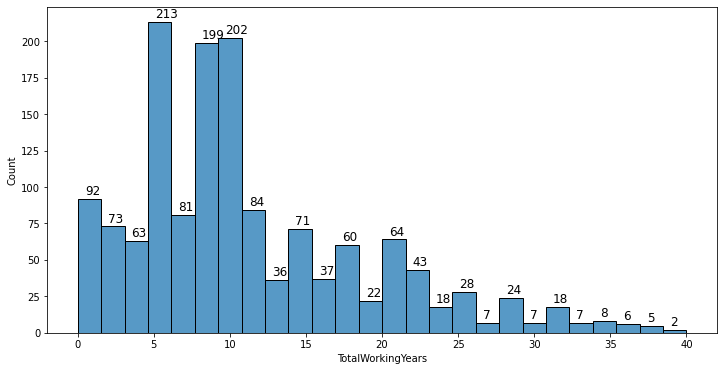

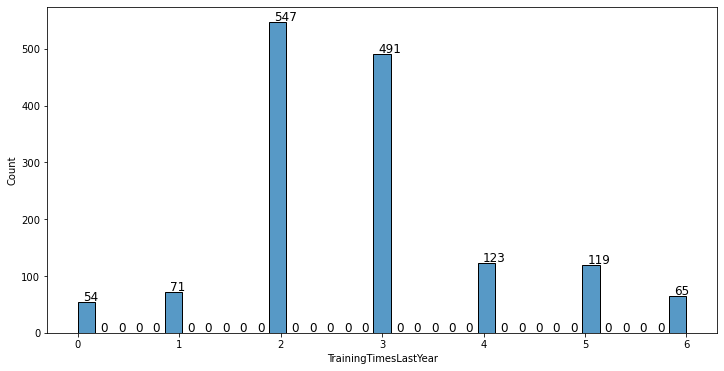

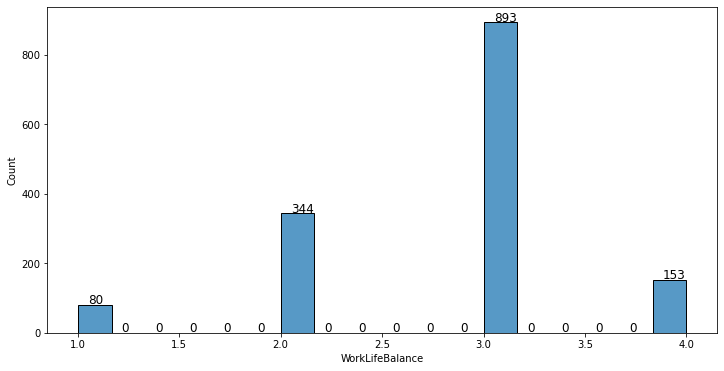

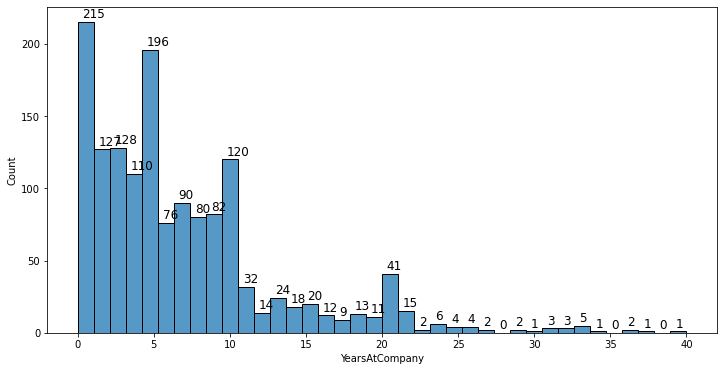

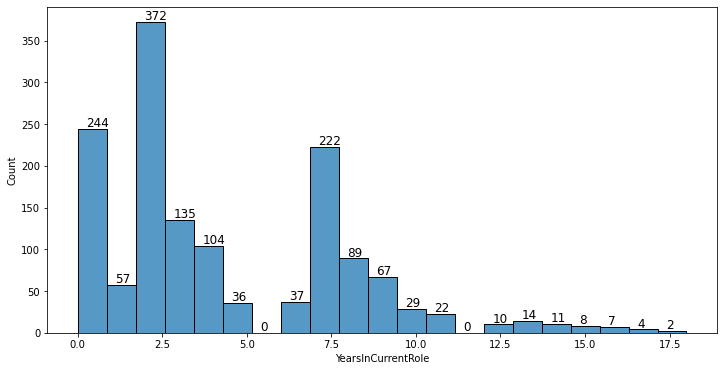

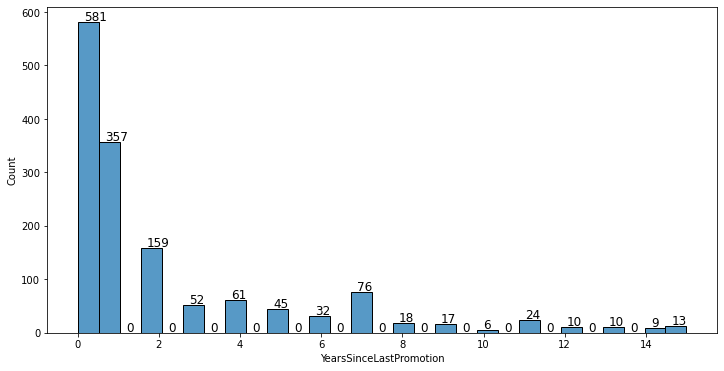

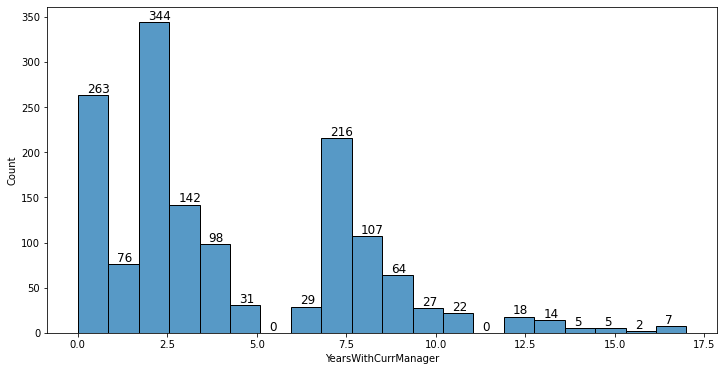

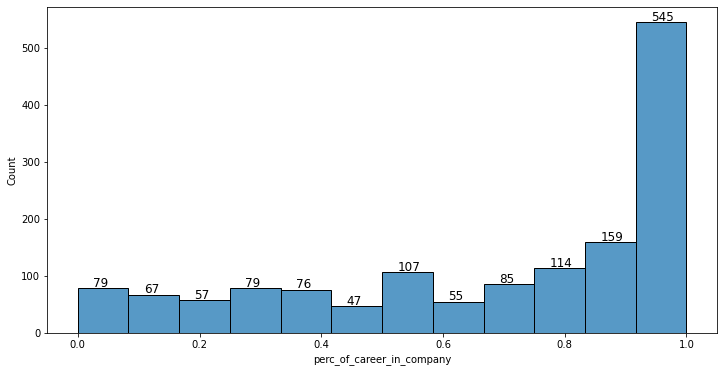

In [17]:
for column in HR_Data_Frame.columns: 
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.histplot(data=HR_Data_Frame, x=HR_Data_Frame[column], stat="count")
    for p in ax.patches:
        percentage = p.get_height()
        x = p.get_x() + p.get_width() / 2 - p.get_width() / 5
        y = p.get_y() + p.get_height() + 3
        ax.annotate(percentage, (x, y), size = 12)

### Separate to Juniors, Mids and Seniors

<AxesSubplot:ylabel='Frequency'>

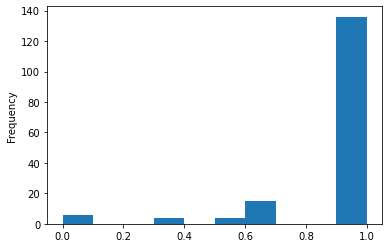

In [18]:
HR_Data_Frame.loc[HR_Data_Frame['TotalWorkingYears']<=3, 'perc_of_career_in_company'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

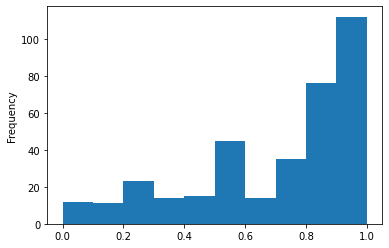

In [19]:
HR_Data_Frame.loc[((HR_Data_Frame['TotalWorkingYears']>3)&(HR_Data_Frame['TotalWorkingYears']<=7)), 'perc_of_career_in_company'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

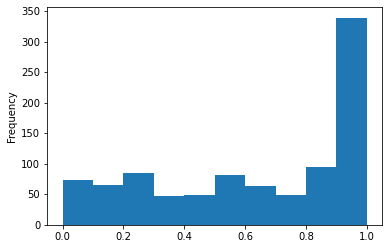

In [20]:
HR_Data_Frame.loc[HR_Data_Frame['TotalWorkingYears']>7, 'perc_of_career_in_company'].plot.hist()

In [21]:
# Check Data Frame For any Missing Data
na_cols = HR_Data_Frame.isna().sum()
na_cols[na_cols!=0]



Series([], dtype: int64)

No Missing Data Mooving Forward

In [22]:
# Looking At Data Distribution

HR_Data_Frame.nunique().sort_values(ascending=False)

# From Results We see that Collumns 'Over18' 'StandardHours' 'EmployeeCount' Have Only
# 1 distict Value Therefore we can remove them.
# Also 'EmployeeNumber' Have Distinct Value For Every Employee From Name We can assume it is identifier and meaningless


MonthlyRate                  1427
MonthlyIncome                1349
DailyRate                     886
perc_of_career_in_company     192
HourlyRate                     71
Age                            43
TotalWorkingYears              40
YearsAtCompany                 37
DistanceFromHome               29
YearsInCurrentRole             19
YearsWithCurrManager           18
YearsSinceLastPromotion        16
PercentSalaryHike              15
NumCompaniesWorked             10
JobRole                         9
TrainingTimesLastYear           7
EducationField                  6
Education                       5
JobLevel                        5
JobSatisfaction                 4
JobInvolvement                  4
EnvironmentSatisfaction         4
WorkLifeBalance                 4
StockOptionLevel                4
RelationshipSatisfaction        4
MaritalStatus                   3
BusinessTravel                  3
Department                      3
PerformanceRating               2
Gender        

In [23]:
# Removing Columns
#HR_Data_Frame.drop(columns=['Over18','StandardHours','EmployeeCount','EmployeeNumber', 'EmployeeNumber'], inplace=True) #think of removing Age and Gender as well



In [24]:
HR_Data_Frame.shape

(1470, 32)

In [25]:
# Look At Data 
HR_Data_Frame.head(10)

Age  Attrition  BusinessTravel  DailyRate              Department  \
0   41          1               1       1102                   Sales   
1   49          0               2        279  Research & Development   
2   37          1               1       1373  Research & Development   
3   33          0               2       1392  Research & Development   
4   27          0               1        591  Research & Development   
5   32          0               2       1005  Research & Development   
6   59          0               1       1324  Research & Development   
7   30          0               1       1358  Research & Development   
8   38          0               2        216  Research & Development   
9   36          0               1       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   
7                24          1  Life Sciences                        4   
8                23          3  Life Sciences                        4   
9                27          3        Medical                        3   

   Gender  ...  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0  Female  ...                         1                 0                  8   
1    Male  ...                         4                 1                 10   
2    Male  ...                         2                 0                  7   
3  Female  ...                         3                 0                  8   
4    Male  ...                         4                 1                  6   
5    Male  ...                         3                 0                  8   
6  Female  ...                         1                 3                 12   
7    Male  ...                         2                 1                  1   
8    Male  ...                         2                 0                 10   
9    Male  ...                         2                 2                 17   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     0                1              6                   4   
1                     3                3             10                   7   
2                     3                3              0                   0   
3                     3                3              8                   7   
4                     3                3              2                   2   
5                     2                2              7                   7   
6                     3                2              1                   0   
7                     2                3              1                   0   
8                     2                3              9                   7   
9                     3                2              7                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  perc_of_career_in_company  
0                        0                     5                   0.750000  
1                        1                     7                   1.000000  
2                        0                     0                   0.000000  
3                        3                     0                   1.000000  
4                        2                     2                   0.333333  
5                        3                     6                   0.875000  
6                        0                     0                   0.083333  
7        

In [26]:
HR_Data_Frame['BusinessTravel'].unique()
# now decide on the order of the values and map it to 0,1,2 (or 1,2,3)

array([1, 2, 0], dtype=int64)


### Define 3 types of columns:
1. numeric columns, don't encode
2. categorical columns, that have 2 possible values- label encoder works fine (to 0, 1)
3. categorical columns, that have more than 2 possible values: check if ordinal

  3.a if ordinal: map the categories to an ordical set of values (1,2,3,4... by the meaning of the categories)

  3.b if not ordinal: use OneHotEncoder


DONT USE LABEL ENCODER ON FEATURES.

In [27]:
# Looking At collumns Data Types
HR_Data_Frame.info()

# Collumns : 'Attrition' (target) 'BusinessTravel' 'Department' 'EducationField' 'Gender' 
#'JobRole' 'MaritalStatus' 'OverTime' Are not numeric we should use an encoder on these collumns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1470 non-null   int64   
 1   Attrition                  1470 non-null   int64   
 2   BusinessTravel             1470 non-null   int64   
 3   DailyRate                  1470 non-null   int64   
 4   Department                 1470 non-null   category
 5   DistanceFromHome           1470 non-null   int64   
 6   Education                  1470 non-null   int64   
 7   EducationField             1470 non-null   category
 8   EnvironmentSatisfaction    1470 non-null   int64   
 9   Gender                     1470 non-null   category
 10  HourlyRate                 1470 non-null   int64   
 11  JobInvolvement             1470 non-null   int64   
 12  JobLevel                   1470 non-null   int64   
 13  JobRole                    1470 n

In [28]:
one_hot_HR = pd.get_dummies(HR_Data_Frame)

In [29]:
one_hot_HR

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0      41          1               1       1102                 1          2   
1      49          0               2        279                 8          1   
2      37          1               1       1373                 2          2   
3      33          0               2       1392                 3          4   
4      27          0               1        591                 2          1   
...   ...        ...             ...        ...               ...        ...   
1465   36          0               2        884                23          2   
1466   39          0               1        613                 6          1   
1467   27          0               1        155                 4          3   
1468   49          0               2       1023                 2          3   
1469   34          0               1        628                 8          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                           2          94               3         2  ...   
1                           3          61               2         2  ...   
2                           4          92               2         1  ...   
3                           4          56               3         1  ...   
4                           1          40               3         1  ...   
...                       ...         ...             ...       ...  ...   
1465                        3          41               4         2  ...   
1466                        4          42               2         3  ...   
1467                        2          87               4         2  ...   
1468                        4          63               2         2  ...   
1469                        2          82               4         2  ...   

      JobRole_Laboratory Technician  JobRole_Manager  \
0                                 0                0   
1                                 0                0   
2                                 1                0   
3                                 0                0   
4                                 1                0   
...                             ...              ...   
1465                              1                0   
1466                              0                0   
1467                              0                0   
1468                              0                0   
1469                              1                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
1465                               0                          0   
1466                               0                          0   
1467                               1                          0   
1468                               0                          0   
1469                               0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                              0                        1   
1                              1                        0   
2                              0                        0   
3                              1                        0   
4                              0                        0   
...                          ...                      ...   
1465                           0                        0   
1466                           0                        0   
1467                           0                        0   
1468                           0            

In [30]:
one_hot_HR.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'perc_of_career_in_company',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laborator

In [31]:
def get_label_encodinds(df, col_name):
    
    return LabelEncoder().fit_transform(HR_Data_Frame[col_name])

for col in HR_Data_Frame.columns:
    HR_Data_Frame[col] = get_label_encodinds(HR_Data_Frame, col)

# HR_Data_Frame["Attrition"] = LabelEncoder().fit_transform(HR_Data_Frame['Attrition'])
# HR_Data_Frame["BusinessTravel"] = LabelEncoder().fit_transform(HR_Data_Frame['BusinessTravel'])
# HR_Data_Frame["Department"] = LabelEncoder().fit_transform(HR_Data_Frame['Department'])
# HR_Data_Frame["EducationField"] = LabelEncoder().fit_transform(HR_Data_Frame['EducationField'])
# HR_Data_Frame["Gender"] = LabelEncoder().fit_transform(HR_Data_Frame['Gender'])
# HR_Data_Frame["JobRole"] = LabelEncoder().fit_transform(HR_Data_Frame['JobRole'])
# HR_Data_Frame["MaritalStatus"] = LabelEncoder().fit_transform(HR_Data_Frame['MaritalStatus'])
# HR_Data_Frame["OverTime"] = LabelEncoder().fit_transform(HR_Data_Frame['OverTime'])

In [32]:
# Look if data is balanced

# HR_Data_Frame.groupby('Attrition').count()
HR_Data_Frame['Attrition'].mean() #16% of the observations has attrition (attrition =True   <=> attrition=1   => mean(attrition) = (1/n)*sum(attrition) = (1/n)*(number of attrited) = %attrited)

print(f"percent of attrition: {HR_Data_Frame['Attrition'].mean()}")
# 80% of data is not attrited while 20% is attrited we should use over sampeling for balance.

percent of attrition: 0.16122448979591836


In [33]:
print(f'Note that this is wrong calculation: {237/(1233)}')
print(f'Note that this is the correct calculation: {237/(1233+237)}')



Note that this is wrong calculation: 0.1922141119221411
Note that this is the correct calculation: 0.16122448979591836


In [34]:
# !pip install plotly
import plotly.express as px

fig = px.bar(HR_Data_Frame.corr()['Attrition'].drop('Attrition')[:-1], title='Feature Correlation Table',color_discrete_sequence=[px.colors.qualitative.Set3[5]])
fig.update_layout(plot_bgcolor = "white")
fig.show()

In [35]:
#!pip uninstall numpy
#!pip install -U scikit-learn
#!pip3 install imblearn 
#!pip install delayed


In [36]:
#!pip install scikit-learn --upgrade
from imblearn.over_sampling import SMOTE


In [37]:
cols = list(HR_Data_Frame.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(HR_Data_Frame[cols],HR_Data_Frame["Attrition"])

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],
                                                 target,
                                                 test_size = 0.3,
                                                 shuffle=True)

In [39]:
print("Train Feature Size : ",len(X_train))
print("Train Label Size : ",len(Y_train))
print("Test Feature Size : ",len(X_test))
print("Test Label Size : ",len(Y_test))

Train Feature Size :  1726
Train Label Size :  1726
Test Feature Size :  740
Test Label Size :  740


In [40]:
# Check if new train data is balanced
Y_train.value_counts()

1    867
0    859
Name: Attrition, dtype: int64

In [41]:
# Check if new test data is balanced
Y_test.value_counts()

0    374
1    366
Name: Attrition, dtype: int64

In [42]:
def get_evaluation_dict(actual, predicted):
    d = {}
    d['accuracy_score'] = str(round(accuracy_score(actual, predicted)*100, 2))+'%'
    d['precision_score'] = str(round(precision_score(actual, predicted)*100, 2))+'%'
    d['recall_score'] = str(round(recall_score(actual, predicted)*100, 2))+'%'
    d['f1_score'] = str(round(f1_score(actual, predicted)*100, 2))+'%'
    d['roc_auc_score'] = str(round(roc_auc_score(actual, predicted)*100, 2))+'%'

    return d

In [43]:
def print_dict_pretty(d):
    for k in d:
        print(f'{k}: {d[k]}')

Train evaluation:
accuracy_score: 83.72%
precision_score: 83.37%
recall_score: 84.43%
f1_score: 83.9%
roc_auc_score: 83.72%

Test evaluation:
accuracy_score: 83.38%
precision_score: 84.23%
recall_score: 81.69%
f1_score: 82.94%
roc_auc_score: 83.36%


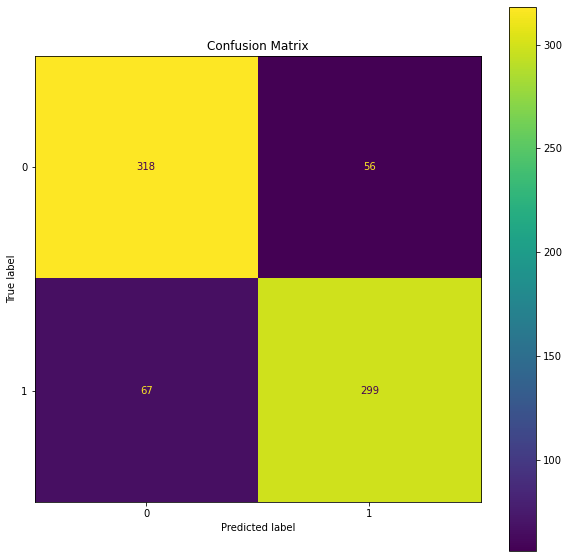

In [44]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
print("Train evaluation:")
print_dict_pretty(get_evaluation_dict(Y_train, logistic_model.predict(X_train)))
print('\nTest evaluation:')
print_dict_pretty(get_evaluation_dict(Y_test, logistic_model.predict(X_test)))

# print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
# print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

Train evaluation:
accuracy_score: 100.0%
precision_score: 100.0%
recall_score: 100.0%
f1_score: 100.0%
roc_auc_score: 100.0%

Test evaluation:
accuracy_score: 90.54%
precision_score: 92.53%
recall_score: 87.98%
f1_score: 90.2%
roc_auc_score: 90.51%


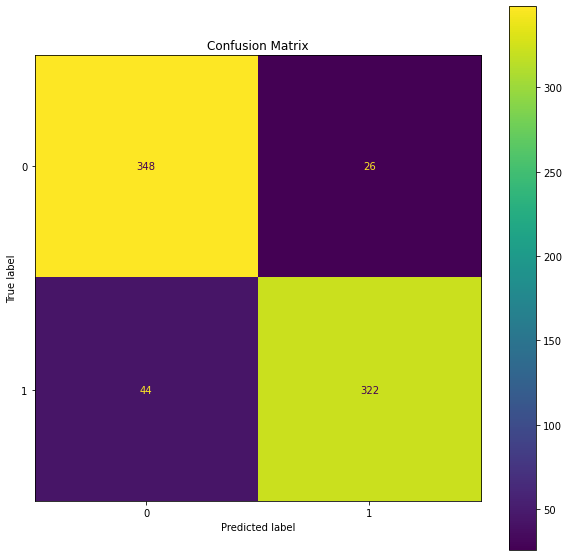

In [45]:
random_forest = RandomForestClassifier(n_estimators=590,
                                       random_state=0).fit(X_train,Y_train)
print("Train evaluation:")
print_dict_pretty(get_evaluation_dict(Y_train, random_forest.predict(X_train)))
print('\nTest evaluation:')
print_dict_pretty(get_evaluation_dict(Y_test, random_forest.predict(X_test)))


cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [46]:
importances = random_forest.feature_importances_
feature_names = X_train.columns.tolist()
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)


In [47]:
forest_importances_df = pd.DataFrame(forest_importances, columns=['importance'])
forest_importances_df['std'] = std
forest_importances_df.sort_values(by='importance', ascending=False, inplace=True)
forest_importances_df.head(10)

importance       std
StockOptionLevel            0.082706  0.041860
JobSatisfaction             0.059156  0.029040
MonthlyIncome               0.057204  0.025848
JobInvolvement              0.050866  0.029142
EnvironmentSatisfaction     0.048931  0.022941
Age                         0.044400  0.020121
RelationshipSatisfaction    0.043162  0.022388
MonthlyRate                 0.042050  0.015277
DailyRate                   0.040330  0.015037
DistanceFromHome            0.037464  0.014383

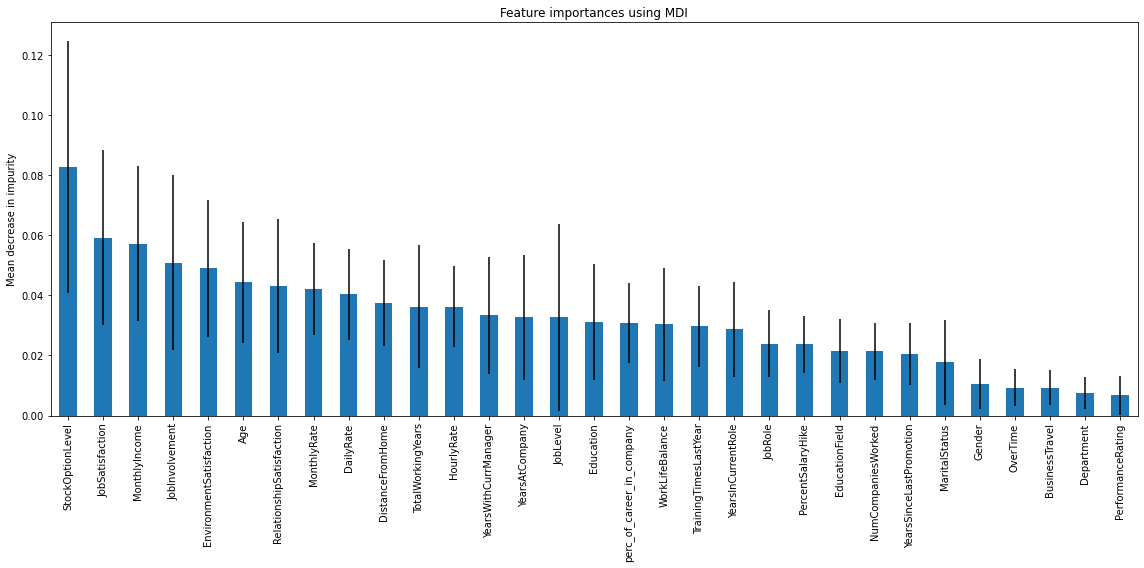

In [48]:
####### MAKE SURE THE VALUES ARE IN THE RIGHT ORDER, IF NOT- FIX IT OR REMOVE THE SORT VALUES PART
fig, ax = plt.subplots()
forest_importances_df['importance'].plot.bar(yerr=forest_importances_df['std'], ax=ax, figsize=(16,8))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Conclusions & Summary

A state of employee burnout has high costs for the company due to loss of knowledge and a high cost for training employees in their place. With the help of the data kept on employees, it is possible to get a forecast for employee burnout. It is necessary to take care of the balance of the data that train the model and that are used to test the model. There is no single factor that can predict employee burnout, rather, the parameters that correlate relatively highly with employee burnout are salary (of its types) and involvement and job satisfaction, which implies that when an employee shows signs of burnout, the company must not only look at the benefits and the salary, but it is necessary to ensure that the employee feels engaged and satisfied in his role in the company and in the team, to balance the factors and identify where the employee expresses dissatisfaction. Of course, in order to test the real feasibility of using models to identify attrition factors in high-tech employees, real data from many employees in the global industry must be used. When receiving a data model, it is important to look On the distribution of the data and its meaning, by correctly understanding the data, it is possible to eliminate irrelevant columns (such as unique data for each record or uniform data for all records), columns that provide information of the same meaning for each record, and it is also possible to create new columns that can provide us with additional information and help the model predict the results better.